In [1]:
import csv

f = open("H&M.csv", "w", encoding='utf-8')
writer = csv.DictWriter(f, fieldnames=["name","brand","gender","category","size","price","composition","color","url","img_url","article_no","blob_url"])
writer.writeheader()
f.close()


In [2]:
!wget -O "auth.json" https://dl.dropbox.com/s/p1ifzzf2443r05g/urbankiddo-c8528ce11ed0.json

--2019-07-18 08:13:33--  https://dl.dropbox.com/s/p1ifzzf2443r05g/urbankiddo-c8528ce11ed0.json
Resolving dl.dropbox.com (dl.dropbox.com)... 162.125.1.6, 2620:100:6016:6::a27d:106
Connecting to dl.dropbox.com (dl.dropbox.com)|162.125.1.6|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://dl.dropboxusercontent.com/s/p1ifzzf2443r05g/urbankiddo-c8528ce11ed0.json [following]
--2019-07-18 08:13:33--  https://dl.dropboxusercontent.com/s/p1ifzzf2443r05g/urbankiddo-c8528ce11ed0.json
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.1.6, 2620:100:6016:6::a27d:106
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.1.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2315 (2.3K) [text/plain]
Saving to: ‘auth.json’

auth.json           100%[===================>]   2.26K  --.-KB/s    in 0s      

2019-07-18 08:13:34 (44.2 MB/s) - ‘auth.json’ saved [2315/2315]



In [3]:
from google.cloud import storage

def upload_to_bucket(blob_name, path_to_file):
    """ Upload data to a bucket""" #doc string in function

    # Explicitly use service account credentials by specifying the private key
    # file.
    storage_client = storage.Client.from_service_account_json(
        'auth.json')

    #print(buckets = list(storage_client.list_buckets())

    bucket = storage_client.get_bucket('urbankiddo')
    blob = bucket.blob(blob_name)
    blob.upload_from_filename(path_to_file)

    #returns a public url
    return blob.public_url

In [4]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


In [5]:
import requests

ur="https://www2.hm.com/sv_se/barn/produkter/nyfodd.html"
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}


r=requests.get(ur, headers=headers)
html_doc=r.content.decode()
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')

In [6]:
filters=soup.find_all("div", attrs={ "id" :"drawer-productTypes"})
soup2 = BeautifulSoup(str(filters), 'html.parser')
#print(soup.prettify())
pr=[]
cnt=[]
prods=soup2.find_all("li", attrs={ "class" :"inputwrapper level-list-item"}) #loop
for subc in prods:
    pr.append(subc.find("span",attrs={ "class" :"text"}).text)
    cnt.append(subc.find("span",attrs={ "class" :"item-count"}).text)

In [7]:
list(zip(pr,cnt))

[('babybody', '114'),
 ('babyscarf', '15'),
 ('blus', '3'),
 ('byxor', '84'),
 ('cardigan', '18'),
 ('halsduk', '12'),
 ('hatt', '3'),
 ('hårband', '5'),
 ('jacka', '7'),
 ('jumpsuit', '37'),
 ('kjol', '1'),
 ('klänning', '22'),
 ('leggings', '40'),
 ('mössa', '24'),
 ('overall', '5'),
 ('pannband', '1'),
 ('pufftrosa', '2'),
 ('pyjamas', '41'),
 ('shorts', '25'),
 ('skjorta', '5'),
 ('skor', '8'),
 ('sovpåse', '15'),
 ('stickad tröja', '5'),
 ('strumpbyxor', '24'),
 ('strumpor', '44'),
 ('t-shirt', '43'),
 ('tofflor', '23'),
 ('topp', '15'),
 ('tröja', '51'),
 ('vantar', '1'),
 ('väst', '1')]

In [8]:
!mkdir 'H&M' && ls

auth.json	    H&M-Baby-girl.ipynb  H&M.csv	  H&M.ipynb
H&M		    H&M_boy.ipynb	 H&M_girl.ipynb   tutorials
H&M_baby_boy.ipynb  H&M_boys.ipynb	 H&M_girls.ipynb


In [9]:
ur

'https://www2.hm.com/sv_se/barn/produkter/nyfodd.html'

In [10]:
import urllib.request as req
import time
import random

base=str("https://www2.hm.com")
brand='H&M'
gender='unisex'
size='50-74'

for p,c in zip(pr,cnt):
  category=p
  p=p.replace(' ','+')
  url2=ur+str('?productTypes=')+p+str('&page-size=')+c
  print(url2)
  s=requests.get(url2,headers=headers)
  html_doc2=s.content.decode()
  soup2 = BeautifulSoup(html_doc2, 'html.parser')
  products=soup2.find_all("div", attrs={ "class" :"image-container"})
  print(len(products))
  
  for product in products:
    ext=product.a['href']
    name=product.a["title"]
    url3=base+ext
    p=requests.get(url3,headers=headers)
    html_doc3=p.content.decode()
    soup3 = BeautifulSoup(html_doc3, 'html.parser')
    sub_product=soup3.find("div", attrs={ "class" :"mini-slider"})
    html_doc4=str(sub_product)
    soup4=BeautifulSoup(html_doc4, 'html.parser')
    spa=soup4.find_all("li", attrs={ "class" :"list-item"})
    for sp in spa:
      ext2=sp.a['href']
      color=sp.a['title']
      url5=base+ext2
      spr=requests.get(url5,headers=headers)
      html_doc5=spr.content.decode()
      soup5 = BeautifulSoup(html_doc5, 'html.parser')
      
      iu=soup5.find("figure", attrs={ "class" :"pdp-image product-detail-images product-detail-main-image"})
      img_url=iu.div.img['src']
      desc=soup5.find("section", attrs={ "class" :"name-price"})
      price=desc.span.text.strip()
      qy=soup5.find("div", attrs={ "class" :"js-before-secondary-images"})
      composition=qy.div.ul.li.ul.li.text      
      a=ext2
      article_no=a.lstrip('/sv_se/productpage.').rstrip('.html')
      url=url5
      
      img_url = "https:" + img_url
      img_url=img_url.replace(' ','+')
      ac='H&M'+'/'+article_no+str('.jpg')
      req.urlretrieve(img_url,ac)
      
      blob_name=str('H&M')+str('/')+str(article_no)
      path_to_file='H&M/'+article_no+str('.jpg')
      blob_url=upload_to_bucket(blob_name, path_to_file)
      with open("H&M.csv", "a", encoding='utf-8') as f:
                  writer = csv.writer(f)
                  writer.writerow([name,brand,gender,category,size,price,composition,color,url,img_url,article_no,blob_url])
      print(name,brand,gender,category,size,price,composition,color,url,img_url,article_no,blob_url)
#       sl=random.randint(1,5)
#       print('sleeping :','',sl,'seconds')
#       time.sleep(sl)
      

https://www2.hm.com/sv_se/barn/produkter/nyfodd.html?productTypes=babybody&page-size=114
114
3-pack omlottbody H&M unisex babybody 50-74 149,00 kr. Bomull 100% Vit https://www2.hm.com/sv_se/productpage.0701784001.html https://lp2.hm.com/hmgoepprod?set=source[/51/45/514519bf74569b4071f87a910bcdb84847068244.jpg],origin[dam],category[],type[DESCRIPTIVESTILLLIFE],res[m],hmver[1]&call=url[file:/product/main]+ 0701784001 https://storage.googleapis.com/urbankiddo/H%26M/0701784001
3-pack omlottbody H&M unisex babybody 50-74 79,90 kr. Bomull 100% Mörkbeige/Prickig https://www2.hm.com/sv_se/productpage.0701784002.html https://lp2.hm.com/hmgoepprod?set=source[/08/be/08be2a1c3e6949fb7865bd2c7080f8edcdffc06e.jpg],origin[dam],category[kids_newborn_bodies],type[DESCRIPTIVESTILLLIFE],res[m],hmver[1]&call=url[file:/product/main]+ 0701784002 https://storage.googleapis.com/urbankiddo/H%26M/0701784002
3-pack omlottbody H&M unisex babybody 50-74 69,90 kr. Bomull 100% Gul/Djur https://www2.hm.com/sv_se/prod

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['size', 'product', 'random', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


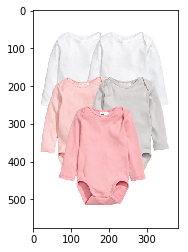

In [11]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('H&M/0533261001.jpg')
imgplot = plt.imshow(img)
plt.show()

In [12]:
!ls

auth.json	    H&M-Baby-girl.ipynb  H&M.csv	  H&M.ipynb
H&M		    H&M_boy.ipynb	 H&M_girl.ipynb   tutorials
H&M_baby_boy.ipynb  H&M_boys.ipynb	 H&M_girls.ipynb


In [13]:
import pandas as pd
df=pd.read_csv("H&M.csv", encoding='utf-8',index_col=False)
print(df.count())
df.head()

name           3611
brand          3611
gender         3611
category       3611
size           3611
price          3611
composition    3611
color          3611
url            3611
img_url        3611
article_no     3611
blob_url       3611
dtype: int64


,name,brand,gender,category,size,price,composition,color,url,img_url,article_no,blob_url
0,3-pack omlottbody,H&M,unisex,babybody,50-74,"149,00 kr.",Bomull 100%,Vit,https://www2.hm.com/sv_se/productpage.07017840...,https://lp2.hm.com/hmgoepprod?set=source[/51/4...,701784001,https://storage.googleapis.com/urbankiddo/H%26...
1,3-pack omlottbody,H&M,unisex,babybody,50-74,"79,90 kr.",Bomull 100%,Mörkbeige/Prickig,https://www2.hm.com/sv_se/productpage.07017840...,https://lp2.hm.com/hmgoepprod?set=source[/08/b...,701784002,https://storage.googleapis.com/urbankiddo/H%26...
2,3-pack omlottbody,H&M,unisex,babybody,50-74,"69,90 kr.",Bomull 100%,Gul/Djur,https://www2.hm.com/sv_se/productpage.07017840...,https://lp2.hm.com/hmgoepprod?set=source[/ba/b...,701784003,https://storage.googleapis.com/urbankiddo/H%26...
3,3-pack omlottbody,H&M,unisex,babybody,50-74,"149,00 kr.",Bomull 100%,Mörkblå/Ankaren,https://www2.hm.com/sv_se/productpage.07017840...,https://lp2.hm.com/hmgoepprod?set=source[/01/3...,701784004,https://storage.googleapis.com/urbankiddo/H%26...
4,3-pack omlottbody,H&M,unisex,babybody,50-74,"79,90 kr.",Bomull 100%,Ljusrosa/Jordgubbar,https://www2.hm.com/sv_se/productpage.07017840...,https://lp2.hm.com/hmgoepprod?set=source[/5a/c...,701784005,https://storage.googleapis.com/urbankiddo/H%26...


In [46]:
len(df['article_no'].unique())
df['article_no'].duplicated(keep='first')
h=df['article_no']==579010012
for c,i in enumerate(h):
    if i==True:
        print(c)

3443
3487
3537
3564
3581
3598


In [54]:
df.iloc[3443]['blob_url']

'https://storage.googleapis.com/urbankiddo/H%26M/0579010012'

In [53]:
df.iloc[3487]['blob_url']

'https://storage.googleapis.com/urbankiddo/H%26M/0579010012'

In [55]:
df2=df.drop_duplicates()
df2.count()

name           1456
brand          1456
gender         1456
category       1456
size           1456
price          1456
composition    1456
color          1456
url            1456
img_url        1456
article_no     1456
blob_url       1456
dtype: int64

In [1]:
from google.cloud import storage
storage_client = storage.Client.from_service_account_json('auth.json')
bucket = storage_client.get_bucket('urbankiddo')
blob = bucket.blob('H&M/H&M_new_born.csv')
blob.upload_from_filename('H&M_new_born.csv')
blob.public_url

'https://storage.googleapis.com/urbankiddo/H%26M/H%26M_new_born.csv'